In [1]:
Path = "hdfs:/user/hduser/MovieRecom/ml-100k"  

In [2]:
rawUserData = sc.textFile(Path+'/u.user')
print rawUserData.count()
print rawUserData.first()

943
1|24|M|technician|85711


# Establish DataFrame

In [3]:
rawUserData.take(7)

[u'1|24|M|technician|85711',
 u'2|53|F|other|94043',
 u'3|23|M|writer|32067',
 u'4|24|M|technician|43537',
 u'5|33|F|other|15213',
 u'6|42|M|executive|98101',
 u'7|57|M|administrator|91344']

In [4]:
userRDD = rawUserData.map(lambda line: line.split("|"))
userRDD.take(7)

[[u'1', u'24', u'M', u'technician', u'85711'],
 [u'2', u'53', u'F', u'other', u'94043'],
 [u'3', u'23', u'M', u'writer', u'32067'],
 [u'4', u'24', u'M', u'technician', u'43537'],
 [u'5', u'33', u'F', u'other', u'15213'],
 [u'6', u'42', u'M', u'executive', u'98101'],
 [u'7', u'57', u'M', u'administrator', u'91344']]

In [5]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [6]:
from pyspark.sql import Row
user_Rows = userRDD.map(lambda p:
     Row(
         userid=int(p[0]),
         age=int(p[1]),
         gender=p[2],
         occupation=p[3],
         zipcode=p[4]
    )                              
)
user_Rows.take(5)

[Row(age=24, gender=u'M', occupation=u'technician', userid=1, zipcode=u'85711'),
 Row(age=53, gender=u'F', occupation=u'other', userid=2, zipcode=u'94043'),
 Row(age=23, gender=u'M', occupation=u'writer', userid=3, zipcode=u'32067'),
 Row(age=24, gender=u'M', occupation=u'technician', userid=4, zipcode=u'43537'),
 Row(age=33, gender=u'F', occupation=u'other', userid=5, zipcode=u'15213')]

In [7]:
user_df = sqlContext.createDataFrame(user_Rows)
user_df.printSchema()

root
 |-- age: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- userid: long (nullable = true)
 |-- zipcode: string (nullable = true)



In [8]:
user_df.show(5)

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 53|     F|     other|     2|  94043|
| 23|     M|    writer|     3|  32067|
| 24|     M|technician|     4|  43537|
| 33|     F|     other|     5|  15213|
+---+------+----------+------+-------+
only showing top 5 rows



# Spark SQL

In [9]:
user_df.registerTempTable("user_table")

In [10]:
sqlContext.sql("SELECT count(*) counts FROM user_table").show()

+------+
|counts|
+------+
|   943|
+------+



In [11]:
sqlContext.sql("""
SELECT count(*) counts 
FROM user_table
""").show()

+------+
|counts|
+------+
|   943|
+------+



In [12]:
sqlContext.sql("""
SELECT * 
FROM user_table
LIMIT 6
""").show()

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 53|     F|     other|     2|  94043|
| 23|     M|    writer|     3|  32067|
| 24|     M|technician|     4|  43537|
| 33|     F|     other|     5|  15213|
| 42|     M| executive|     6|  98101|
+---+------+----------+------+-------+



Select partial field

In [13]:
userRDDnew = userRDD.map(lambda x:(x[0],x[3],x[2],x[1]))
userRDDnew.take(5)

[(u'1', u'technician', u'M', u'24'),
 (u'2', u'other', u'F', u'53'),
 (u'3', u'writer', u'M', u'23'),
 (u'4', u'technician', u'M', u'24'),
 (u'5', u'other', u'F', u'33')]

method 1 (by field name)

In [14]:
user_df.select("userid","occupation","gender","age").show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|     1|technician|     M| 24|
|     2|     other|     F| 53|
|     3|    writer|     M| 23|
|     4|technician|     M| 24|
|     5|     other|     F| 33|
+------+----------+------+---+
only showing top 5 rows



method 2 (by dataframe.fieldname)

In [15]:
user_df.select(user_df.userid, user_df.occupation, user_df.gender, user_df.age).show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|     1|technician|     M| 24|
|     2|     other|     F| 53|
|     3|    writer|     M| 23|
|     4|technician|     M| 24|
|     5|     other|     F| 33|
+------+----------+------+---+
only showing top 5 rows



method 3 (by keyword)

In [16]:
user_df[user_df['userid'],user_df['occupation'],user_df['gender'],user_df['age']].show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|     1|technician|     M| 24|
|     2|     other|     F| 53|
|     3|    writer|     M| 23|
|     4|technician|     M| 24|
|     5|     other|     F| 33|
+------+----------+------+---+
only showing top 5 rows



# Add additional field

In [17]:
userRDDnew = userRDD.map(lambda x:(x[0],x[3],x[2],x[1],2016-int(x[1])))
userRDDnew.take(5)

[(u'1', u'technician', u'M', u'24', 1992),
 (u'2', u'other', u'F', u'53', 1963),
 (u'3', u'writer', u'M', u'23', 1993),
 (u'4', u'technician', u'M', u'24', 1992),
 (u'5', u'other', u'F', u'33', 1983)]

In [18]:
user_df.select("userid","occupation","gender","age",2016-user_df.age).show(5)

+------+----------+------+---+------------+
|userid|occupation|gender|age|(2016 - age)|
+------+----------+------+---+------------+
|     1|technician|     M| 24|        1992|
|     2|     other|     F| 53|        1963|
|     3|    writer|     M| 23|        1993|
|     4|technician|     M| 24|        1992|
|     5|     other|     F| 33|        1983|
+------+----------+------+---+------------+
only showing top 5 rows



In [19]:
user_df.select("userid","occupation","gender","age",(2016-user_df.age).alias("birthyear")).show(5)

+------+----------+------+---+---------+
|userid|occupation|gender|age|birthyear|
+------+----------+------+---+---------+
|     1|technician|     M| 24|     1992|
|     2|     other|     F| 53|     1963|
|     3|    writer|     M| 23|     1993|
|     4|technician|     M| 24|     1992|
|     5|     other|     F| 33|     1983|
+------+----------+------+---+---------+
only showing top 5 rows



# data filtering

In [20]:
userRDD.filter(lambda r: r[3]=='technician' and r[2]=='M' and r[1]=='24').take(6)

[[u'1', u'24', u'M', u'technician', u'85711'],
 [u'4', u'24', u'M', u'technician', u'43537'],
 [u'456', u'24', u'M', u'technician', u'31820'],
 [u'717', u'24', u'M', u'technician', u'84105'],
 [u'832', u'24', u'M', u'technician', u'77042'],
 [u'889', u'24', u'M', u'technician', u'78704']]

In [21]:
user_df.filter("occupation='technician'").filter("gender='M'").filter("age='24'").show()

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 24|     M|technician|     4|  43537|
| 24|     M|technician|   456|  31820|
| 24|     M|technician|   717|  84105|
| 24|     M|technician|   832|  77042|
| 24|     M|technician|   889|  78704|
+---+------+----------+------+-------+



In [22]:
#oneline mode
user_df.filter("occupation='technician' and gender='M' and age=24").show()

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 24|     M|technician|     4|  43537|
| 24|     M|technician|   456|  31820|
| 24|     M|technician|   717|  84105|
| 24|     M|technician|   832|  77042|
| 24|     M|technician|   889|  78704|
+---+------+----------+------+-------+



In [23]:
user_df.filter((user_df.occupation=='technician') & (user_df.gender=='M') & (user_df.age==24)).show()

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 24|     M|technician|     4|  43537|
| 24|     M|technician|   456|  31820|
| 24|     M|technician|   717|  84105|
| 24|     M|technician|   832|  77042|
| 24|     M|technician|   889|  78704|
+---+------+----------+------+-------+



In [24]:
user_df.filter((user_df['occupation']=='technician') & (user_df['gender']=='M') & (user_df['age']==24)).show()

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 24|     M|technician|     4|  43537|
| 24|     M|technician|   456|  31820|
| 24|     M|technician|   717|  84105|
| 24|     M|technician|   832|  77042|
| 24|     M|technician|   889|  78704|
+---+------+----------+------+-------+



# Data ordering

In [25]:
userRDD.takeOrdered(5, key = lambda x:int(x[1]))

[[u'30', u'7', u'M', u'student', u'55436'],
 [u'471', u'10', u'M', u'student', u'77459'],
 [u'289', u'11', u'M', u'none', u'94619'],
 [u'142', u'13', u'M', u'other', u'48118'],
 [u'609', u'13', u'F', u'student', u'55106']]

In [26]:
userRDD.takeOrdered(5, key = lambda x:-1*int(x[1]))

[[u'481', u'73', u'M', u'retired', u'37771'],
 [u'767', u'70', u'M', u'engineer', u'00000'],
 [u'803', u'70', u'M', u'administrator', u'78212'],
 [u'860', u'70', u'F', u'retired', u'48322'],
 [u'559', u'69', u'M', u'executive', u'10022']]

In [27]:
sqlContext.sql("""
SELECT userid,occupation,gender,age 
FROM user_table
ORDER BY age
""").show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|    30|   student|     M|  7|
|   471|   student|     M| 10|
|   289|      none|     M| 11|
|   142|     other|     M| 13|
|   609|   student|     F| 13|
+------+----------+------+---+
only showing top 5 rows



In [28]:
sqlContext.sql("""
SELECT userid,occupation,gender,age 
FROM user_table
ORDER BY age DESC
""").show(5)

+------+-------------+------+---+
|userid|   occupation|gender|age|
+------+-------------+------+---+
|   481|      retired|     M| 73|
|   860|      retired|     F| 70|
|   767|     engineer|     M| 70|
|   803|administrator|     M| 70|
|   559|    executive|     M| 69|
+------+-------------+------+---+
only showing top 5 rows



In [29]:
user_df.select("userid","occupation","gender","age").orderBy("age").show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|    30|   student|     M|  7|
|   471|   student|     M| 10|
|   289|      none|     M| 11|
|   142|     other|     M| 13|
|   609|   student|     F| 13|
+------+----------+------+---+
only showing top 5 rows



In [30]:
user_df.select("userid","occupation","gender","age").orderBy(user_df.age).show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|    30|   student|     M|  7|
|   471|   student|     M| 10|
|   289|      none|     M| 11|
|   142|     other|     M| 13|
|   609|   student|     F| 13|
+------+----------+------+---+
only showing top 5 rows



In [31]:
user_df.select("userid","occupation","gender","age").orderBy("age", ascending=0).show(5)

+------+-------------+------+---+
|userid|   occupation|gender|age|
+------+-------------+------+---+
|   481|      retired|     M| 73|
|   860|      retired|     F| 70|
|   767|     engineer|     M| 70|
|   803|administrator|     M| 70|
|   559|    executive|     M| 69|
+------+-------------+------+---+
only showing top 5 rows



In [32]:
user_df.select("userid","occupation","gender","age").orderBy(user_df.age.desc()).show(5)

+------+-------------+------+---+
|userid|   occupation|gender|age|
+------+-------------+------+---+
|   481|      retired|     M| 73|
|   860|      retired|     F| 70|
|   767|     engineer|     M| 70|
|   803|administrator|     M| 70|
|   559|    executive|     M| 69|
+------+-------------+------+---+
only showing top 5 rows



In [33]:
userRDD.takeOrdered(5,key = lambda x:(-int(x[1]),x[2]))

[[u'481', u'73', u'M', u'retired', u'37771'],
 [u'860', u'70', u'F', u'retired', u'48322'],
 [u'767', u'70', u'M', u'engineer', u'00000'],
 [u'803', u'70', u'M', u'administrator', u'78212'],
 [u'559', u'69', u'M', u'executive', u'10022']]

In [35]:
sqlContext.sql("""
SELECT userid,age,gender,occupation,zipcode
FROM user_table
ORDER BY age DESC,gender
""").show(5)

+------+---+------+-------------+-------+
|userid|age|gender|   occupation|zipcode|
+------+---+------+-------------+-------+
|   481| 73|     M|      retired|  37771|
|   860| 70|     F|      retired|  48322|
|   803| 70|     M|administrator|  78212|
|   767| 70|     M|     engineer|  00000|
|   559| 69|     M|    executive|  10022|
+------+---+------+-------------+-------+
only showing top 5 rows



In [37]:
user_df.orderBy(["age","gender"],ascending=[0,1]).show(5)

+---+------+-------------+------+-------+
|age|gender|   occupation|userid|zipcode|
+---+------+-------------+------+-------+
| 73|     M|      retired|   481|  37771|
| 70|     F|      retired|   860|  48322|
| 70|     M|     engineer|   767|  00000|
| 70|     M|administrator|   803|  78212|
| 69|     M|    executive|   559|  10022|
+---+------+-------------+------+-------+
only showing top 5 rows



In [39]:
user_df.orderBy(user_df.age.desc(),user_df.gender).show(5)

+---+------+-------------+------+-------+
|age|gender|   occupation|userid|zipcode|
+---+------+-------------+------+-------+
| 73|     M|      retired|   481|  37771|
| 70|     F|      retired|   860|  48322|
| 70|     M|administrator|   803|  78212|
| 70|     M|     engineer|   767|  00000|
| 69|     M|    executive|   559|  10022|
+---+------+-------------+------+-------+
only showing top 5 rows



# DISTINCT Data

In [44]:
userRDD.map(lambda x:x[2]).distinct().collect()

[u'M', u'F']

In [45]:
sqlContext.sql("""
SELECT distinct age,gender FROM user_table
""").show(5)

+---+------+
|age|gender|
+---+------+
| 39|     F|
| 48|     M|
| 26|     M|
| 28|     M|
| 54|     M|
+---+------+
only showing top 5 rows



In [46]:
user_df.select("gender").distinct().show()

+------+
|gender|
+------+
|     F|
|     M|
+------+



In [48]:
user_df.select("age","gender").distinct().show(5)

+---+------+
|age|gender|
+---+------+
| 39|     F|
| 48|     M|
| 26|     M|
| 28|     M|
| 54|     M|
+---+------+
only showing top 5 rows



# Statistics

In [49]:
userRDD.map(lambda x:(x[2],1))\
       .reduceByKey(lambda x,y:x+y).collect()

[(u'M', 670), (u'F', 273)]

In [52]:
userRDD.map(lambda x:((x[2],x[3]),1))\
       .reduceByKey(lambda x,y:x+y).collect()

[((u'M', u'administrator'), 43),
 ((u'M', u'salesman'), 9),
 ((u'M', u'technician'), 26),
 ((u'M', u'none'), 5),
 ((u'F', u'healthcare'), 11),
 ((u'M', u'programmer'), 60),
 ((u'F', u'entertainment'), 2),
 ((u'F', u'artist'), 13),
 ((u'M', u'student'), 136),
 ((u'F', u'other'), 36),
 ((u'F', u'educator'), 26),
 ((u'M', u'retired'), 13),
 ((u'F', u'engineer'), 2),
 ((u'F', u'executive'), 3),
 ((u'F', u'writer'), 19),
 ((u'F', u'scientist'), 3),
 ((u'F', u'librarian'), 29),
 ((u'M', u'homemaker'), 1),
 ((u'M', u'lawyer'), 10),
 ((u'F', u'marketing'), 10),
 ((u'F', u'retired'), 1),
 ((u'M', u'writer'), 26),
 ((u'F', u'programmer'), 6),
 ((u'M', u'doctor'), 7),
 ((u'M', u'educator'), 69),
 ((u'F', u'technician'), 1),
 ((u'M', u'entertainment'), 16),
 ((u'M', u'librarian'), 22),
 ((u'F', u'homemaker'), 6),
 ((u'M', u'scientist'), 28),
 ((u'F', u'student'), 60),
 ((u'M', u'engineer'), 65),
 ((u'M', u'other'), 69),
 ((u'M', u'executive'), 29),
 ((u'M', u'artist'), 15),
 ((u'F', u'salesman'), 

In [53]:
sqlContext.sql("""
SELECT gender,count(*) counts
FROM user_table
GROUP BY gender
""").show(5)

+------+------+
|gender|counts|
+------+------+
|     F|   273|
|     M|   670|
+------+------+



In [54]:
sqlContext.sql("""
SELECT gender,occupation,count(*) counts
FROM user_table
GROUP BY gender,occupation
""").show(10)

+------+-------------+------+
|gender|   occupation|counts|
+------+-------------+------+
|     M|    executive|    29|
|     M|     educator|    69|
|     F|         none|     4|
|     F|entertainment|     2|
|     F|      retired|     1|
|     F|       artist|    13|
|     F|    librarian|    29|
|     F|     engineer|     2|
|     F|   healthcare|    11|
|     F|administrator|    36|
+------+-------------+------+
only showing top 10 rows



In [55]:
user_df.select("gender").groupby("gender").count().show()

+------+-----+
|gender|count|
+------+-----+
|     F|  273|
|     M|  670|
+------+-----+



In [56]:
user_df.select("gender","occupation").groupby("gender","occupation").count()\
       .orderBy("gender","occupation").show(10)

+------+-------------+-----+
|gender|   occupation|count|
+------+-------------+-----+
|     F|administrator|   36|
|     F|       artist|   13|
|     F|     educator|   26|
|     F|     engineer|    2|
|     F|entertainment|    2|
|     F|    executive|    3|
|     F|   healthcare|   11|
|     F|    homemaker|    6|
|     F|       lawyer|    2|
|     F|    librarian|   29|
+------+-------------+-----+
only showing top 10 rows



In [57]:
user_df.stat.crosstab("occupation","gender").show(10)

+-----------------+---+---+
|occupation_gender|  F|  M|
+-----------------+---+---+
|        scientist|  3| 28|
|          student| 60|136|
|           writer| 19| 26|
|         salesman|  3|  9|
|          retired|  1| 13|
|    administrator| 36| 43|
|       programmer|  6| 60|
|           doctor|  0|  7|
|        homemaker|  6|  1|
|        executive|  3| 29|
+-----------------+---+---+
only showing top 10 rows



# Adding ZipCode data

In [69]:
rawDataWithHeader = sc.textFile(Path+'/free-zipcode-database-Primary.csv')
print rawDataWithHeader.count()
print rawDataWithHeader.take(2)

42523
[u'"Zipcode","ZipCodeType","City","State","LocationType","Lat","Long","Location","Decommisioned","TaxReturnsFiled","EstimatedPopulation","TotalWages"', u'"00705","STANDARD","AIBONITO","PR","PRIMARY",18.14,-66.26,"NA-US-PR-AIBONITO","false",,,']


In [70]:
header = rawDataWithHeader.first()
rawData = rawDataWithHeader.filter(lambda x: x != header)
rawData.first()

u'"00705","STANDARD","AIBONITO","PR","PRIMARY",18.14,-66.26,"NA-US-PR-AIBONITO","false",,,'

In [71]:
rData = rawData.map(lambda x:x.replace("\"",""))
rData.first()

u'00705,STANDARD,AIBONITO,PR,PRIMARY,18.14,-66.26,NA-US-PR-AIBONITO,false,,,'

In [72]:
ZipRDD = rData.map(lambda x:x.split(","))
ZipRDD.first()

[u'00705',
 u'STANDARD',
 u'AIBONITO',
 u'PR',
 u'PRIMARY',
 u'18.14',
 u'-66.26',
 u'NA-US-PR-AIBONITO',
 u'false',
 u'',
 u'',
 u'']

In [73]:
from pyspark.sql import Row
zipcode_data = ZipRDD.map(lambda p: Row(
    zipcode=int(p[0]),
    zipCodeType=p[1],
    city=p[2],
    state=p[3]    
    )
)
zipcode_data.take(5)

[Row(city=u'AIBONITO', state=u'PR', zipCodeType=u'STANDARD', zipcode=705),
 Row(city=u'ANASCO', state=u'PR', zipCodeType=u'STANDARD', zipcode=610),
 Row(city=u'ANGELES', state=u'PR', zipCodeType=u'PO BOX', zipcode=611),
 Row(city=u'ARECIBO', state=u'PR', zipCodeType=u'STANDARD', zipcode=612),
 Row(city=u'ADJUNTAS', state=u'PR', zipCodeType=u'STANDARD', zipcode=601)]

In [74]:
zipcode_df = sqlContext.createDataFrame(zipcode_data)
zipcode_df.printSchema()

root
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- zipCodeType: string (nullable = true)
 |-- zipcode: long (nullable = true)



In [76]:
zipcode_df.registerTempTable("zipcode_table")
zipcode_df.show(5)

+--------+-----+-----------+-------+
|    city|state|zipCodeType|zipcode|
+--------+-----+-----------+-------+
|AIBONITO|   PR|   STANDARD|    705|
|  ANASCO|   PR|   STANDARD|    610|
| ANGELES|   PR|     PO BOX|    611|
| ARECIBO|   PR|   STANDARD|    612|
|ADJUNTAS|   PR|   STANDARD|    601|
+--------+-----+-----------+-------+
only showing top 5 rows



# Relational table

In [77]:
sqlContext.sql("""
SELECT u.*, z.city,z.state
From user_table u
LEFT JOIN zipcode_table z ON u.zipcode = z.zipcode
WHERE z.state='NY'
""").show(10)

+---+------+-------------+------+-------+----------+-----+
|age|gender|   occupation|userid|zipcode|      city|state|
+---+------+-------------+------+-------+----------+-----+
| 45|     M|administrator|    48|  12550|  NEWBURGH|   NY|
| 52|     F|    librarian|   204|  10960|     NYACK|   NY|
| 42|     M|        other|   766|  10960|     NYACK|   NY|
| 35|     F|        other|   760|  14211|   BUFFALO|   NY|
| 32|     F|        other|   155|  11217|  BROOKLYN|   NY|
| 30|     F|       writer|   557|  11217|  BROOKLYN|   NY|
| 27|     M|    marketing|   806|  11217|  BROOKLYN|   NY|
| 35|     F|     educator|   450|  11758|MASSAPEQUA|   NY|
| 28|     F|      student|   230|  14476|   KENDALL|   NY|
| 23|     M|administrator|   509|  10011|  NEW YORK|   NY|
+---+------+-------------+------+-------+----------+-----+
only showing top 10 rows



In [79]:
sqlContext.sql("""
SELECT z.state,count(*)
FROM user_table u
LEFT JOIN zipcode_table z ON u.zipcode = z.zipcode
GROUP BY z.state
""").show(10)

+-----+--------+
|state|count(1)|
+-----+--------+
|   AZ|      14|
|   SC|      11|
|   LA|       6|
|   MN|      78|
|   NJ|      18|
|   DC|      14|
|   OR|      20|
| null|      35|
|   VA|      27|
|   RI|       3|
+-----+--------+
only showing top 10 rows



method:by dataframe.fieldname

In [80]:
joined_df = user_df.join(zipcode_df,\
user_df.zipcode == zipcode_df.zipcode,"left_outer")
joined_df.printSchema()

root
 |-- age: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- userid: long (nullable = true)
 |-- zipcode: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- zipCodeType: string (nullable = true)
 |-- zipcode: long (nullable = true)



In [81]:
joined_df.show(10)

+---+------+----------+------+-------+-------------+-----+-----------+-------+
|age|gender|occupation|userid|zipcode|         city|state|zipCodeType|zipcode|
+---+------+----------+------+-------+-------------+-----+-----------+-------+
| 53|     F|     other|     2|  94043|MOUNTAIN VIEW|   CA|   STANDARD|  94043|
| 53|     M|    lawyer|    10|  90703|     CERRITOS|   CA|   STANDARD|  90703|
| 29|     M|     other|   478|  10019|     NEW YORK|   NY|   STANDARD|  10019|
| 30|     M|programmer|   475|  75230|       DALLAS|   TX|   STANDARD|  75230|
| 28|     M|   student|   476|  60440|  BOLINGBROOK|   IL|   STANDARD|  60440|
| 23|     F|   student|   477|  02125|   DORCHESTER|   MA|   STANDARD|   2125|
| 73|     M|   retired|   481|  37771|  LENOIR CITY|   TN|   STANDARD|  37771|
| 29|     M|   student|   473|  94708|     BERKELEY|   CA|   STANDARD|  94708|
| 23|     M|    writer|     3|  32067|  ORANGE PARK|   FL|     PO BOX|  32067|
| 18|     F|   student|   482|  40256|   LOUISVILLE|

In [82]:
joined_df.filter("state='NY'").show(10)

+---+------+-------------+------+-------+----------+-----+-----------+-------+
|age|gender|   occupation|userid|zipcode|      city|state|zipCodeType|zipcode|
+---+------+-------------+------+-------+----------+-----+-----------+-------+
| 45|     M|administrator|    48|  12550|  NEWBURGH|   NY|   STANDARD|  12550|
| 52|     F|    librarian|   204|  10960|     NYACK|   NY|   STANDARD|  10960|
| 42|     M|        other|   766|  10960|     NYACK|   NY|   STANDARD|  10960|
| 35|     F|        other|   760|  14211|   BUFFALO|   NY|   STANDARD|  14211|
| 32|     F|        other|   155|  11217|  BROOKLYN|   NY|   STANDARD|  11217|
| 30|     F|       writer|   557|  11217|  BROOKLYN|   NY|   STANDARD|  11217|
| 27|     M|    marketing|   806|  11217|  BROOKLYN|   NY|   STANDARD|  11217|
| 35|     F|     educator|   450|  11758|MASSAPEQUA|   NY|   STANDARD|  11758|
| 28|     F|      student|   230|  14476|   KENDALL|   NY|   STANDARD|  14476|
| 23|     M|administrator|   509|  10011|  NEW YORK|

In [83]:
GroupByState_df = joined_df.groupBy("state").count()
GroupByState_df.show(5)

+-----+-----+
|state|count|
+-----+-----+
|   AZ|   14|
|   SC|   11|
|   LA|    6|
|   MN|   78|
|   NJ|   18|
+-----+-----+
only showing top 5 rows



# Data Visualization

In [88]:
import pandas as pd
GroupByState_pandas_df = GroupByState_df.toPandas().set_index("state")
GroupByState_pandas_df[0:5]

,count
state,
AZ,14
SC,11
LA,6
MN,78
NJ,18


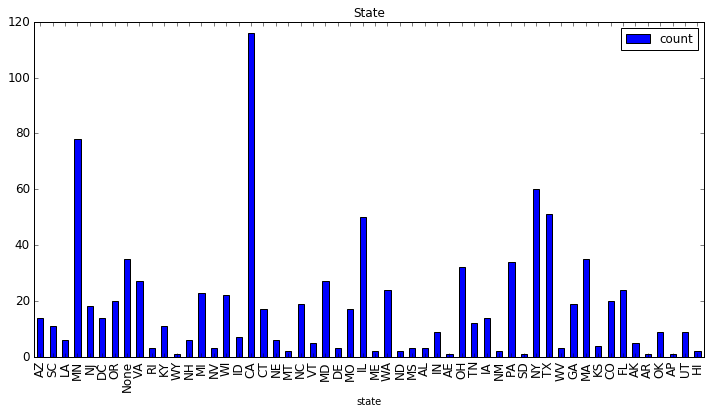

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = GroupByState_pandas_df['count']\
.plot(kind='bar',title='State',figsize=(12,6),legend=True,fontsize=12)
plt.show()

In [93]:
Occupation_df = sqlContext.sql("""
SELECT u.occupation,count(*) counts
FROM user_table u
GROUP BY occupation
""")
Occupation_df.show(5)

+----------+------+
|occupation|counts|
+----------+------+
| librarian|    51|
|   retired|    14|
|    lawyer|    12|
|      none|     9|
|    writer|    45|
+----------+------+
only showing top 5 rows



In [94]:
Occupation_pandas_df = Occupation_df.toPandas().set_index("occupation")
Occupation_pandas_df[:5]

,counts
occupation,
librarian,51
retired,14
lawyer,12
none,9
writer,45


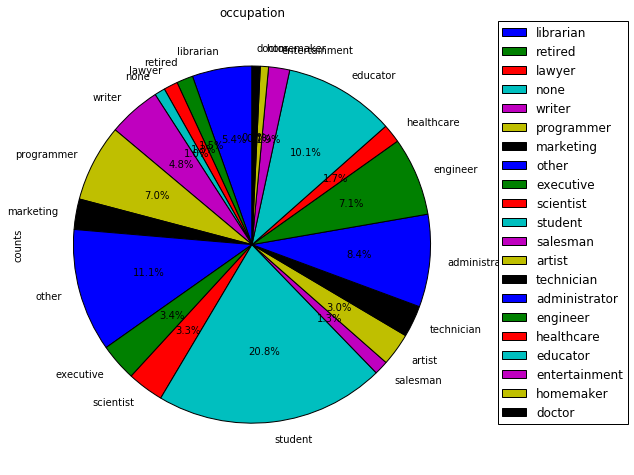

In [97]:
ax = Occupation_pandas_df['counts']\
.plot(kind='pie',title='occupation',figsize=(8,8),startangle=90,autopct='%1.1f%%')
ax.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()